In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
n=1000
X = np.arange(n) / n + 0.1 * np.random.normal(0, 1, n)
Y = 10*np.arange(n) / (n + 1) + 0.1 * np.random.normal(0, 1, n)

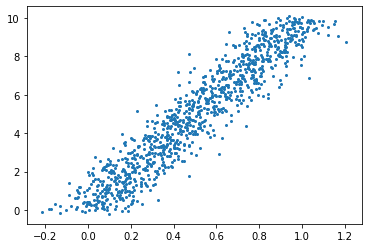

In [3]:
plt.scatter(X,Y,4)

In [4]:
matrix=np.array([X,np.ones(X.size)]).transpose()

In [5]:
def Q(x,y,theta,theta1): #функционал качества
        return np.sum((y-x.dot(np.array([theta,theta1])))**2)/2*y.size

In [6]:
def Q_diff_x(x, y,theta,theta1):#функции для поиска частных производных в точке
        return sum((y - x.dot(np.array([theta,theta1])))*-x[:, 0])/y.size
def Q_diff_y(x, y,theta,theta1):
        return sum((y - x.dot(np.array([theta,theta1])))*-x[:, 1])/y.size

In [7]:
def gradient_descent(theta0, theta1_0, eps,nu,maxstep,bachi): # градиентный спуск
    theta = theta0
    theta1 = theta1_0
    i=0
    list_of_Q=[]
    while i<maxstep:
        i=i+1
        theta0, theta1_0 = theta, theta1
        random_x_y=random.sample(list(zip(matrix, Y)),bachi)
        x=np.array([i[0] for i in random_x_y])
        y=np.array([i[1] for i in random_x_y])
        theta = theta - nu * Q_diff_x(x,y,theta,theta1)
        theta1 = theta1 - nu * Q_diff_y(x,y,theta,theta1)
        list_of_Q.append(Q(x,y,theta,theta1))
        if (abs(theta - theta0) + abs(theta1 - theta1_0) < eps): #критерий остановки
            return theta,theta1,list_of_Q
    return theta,theta1,list_of_Q

In [8]:
#начальные данные
theta_0=0
theta1_0=0
maxstep=1000
nu=0.1
eps=10**-5
bachi=20

In [9]:
result=gradient_descent(theta_0,theta1_0,eps,nu,maxstep,bachi)
theta=result[0]
theta1=result[1]
a=matrix.dot(np.array([theta,theta1]))
print(theta,theta1)

9.026359276983555 0.4776612767251764


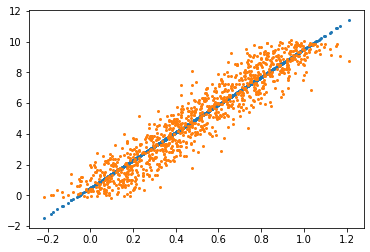

In [10]:
plt.scatter(X,a,4)
plt.scatter(X,Y,4)

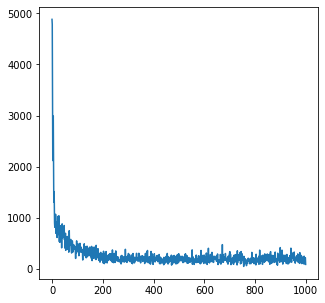

In [11]:
plt.figure(figsize=(5, 5))
plt.plot(result[2])
plt.show()

# Сравним результаты при bachi = 1,10,100,l

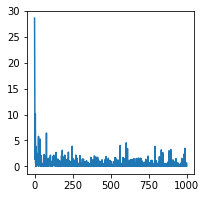

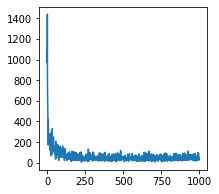

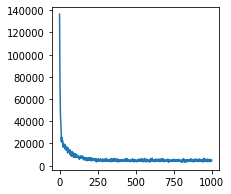

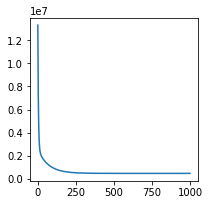

In [12]:
l=1000
list_of_bachi=[1,10,100,l]
for i in list_of_bachi:
    result=gradient_descent(theta_0,theta1_0,eps,nu,maxstep,i)
    plt.figure(figsize=(3, 3))
    plt.plot(result[2])
    plt.show()
